<a href="https://colab.research.google.com/github/ChanifRusydi/pembelajaran-mesin-lanjut/blob/main/Tugas1/TugasKelompok1_20241107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas 1: Multi Armed Bandit** <br>
Grup 1
1. Endang Rusiana
2. Muchammad 'Irfan Chanif Rusydi
3. Dimas Maulana

![Image Description](https://miro.medium.com/v2/resize:fit:720/format:webp/1*5q0Mihf29fftuXpKWWX2uA.png)


# Epsilon-Greedy

True Action Values for Each Arm:
Arm 0: 0.4967
Arm 1: -0.1383
Arm 2: 0.6477
Arm 3: 1.5230
Arm 4: -0.2342
Arm 5: -0.2341
Arm 6: 1.5792
Arm 7: 0.7674
Arm 8: -0.4695
Arm 9: 0.5426


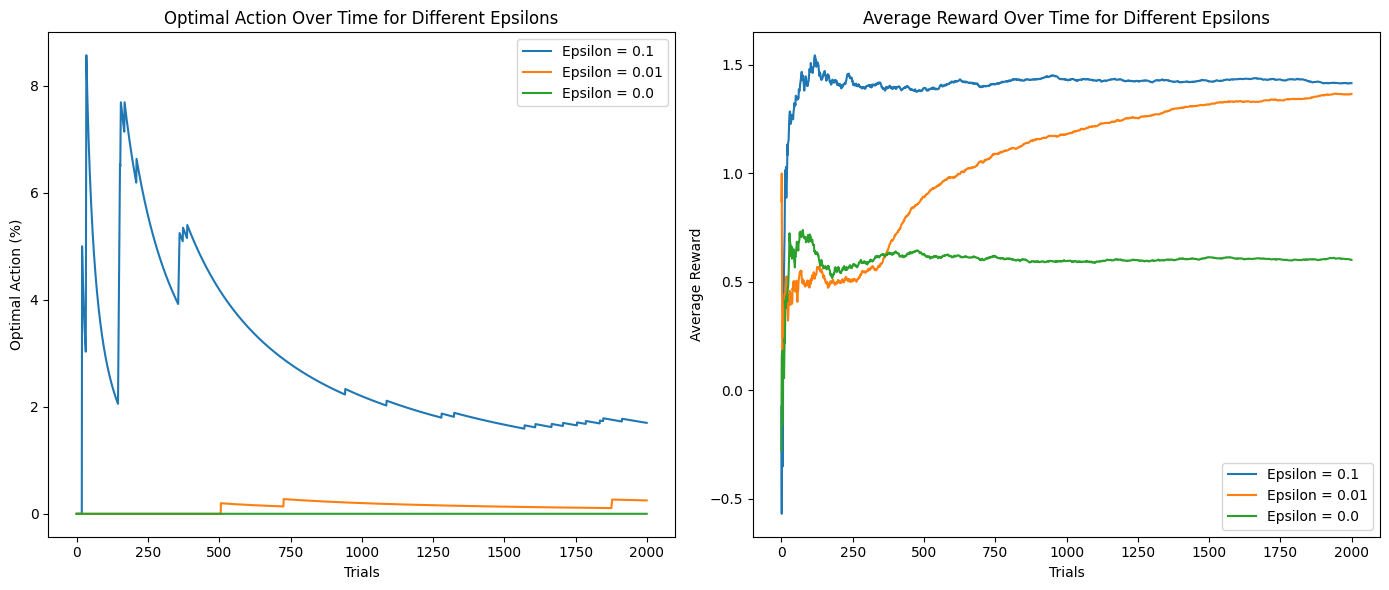

Average reward distribution for epsilon = 0.1:
Arm 0: 0.4267 average reward
Arm 1: 0.0494 average reward
Arm 2: 0.4460 average reward
Arm 3: 1.5514 average reward
Arm 4: -0.1915 average reward
Arm 5: -0.2880 average reward
Arm 6: 1.3068 average reward
Arm 7: 0.9686 average reward
Arm 8: -1.1017 average reward
Arm 9: 0.5413 average reward


Average reward distribution for epsilon = 0.01:
Arm 0: 0.4971 average reward
Arm 1: -0.7111 average reward
Arm 2: -0.1314 average reward
Arm 3: 1.5346 average reward
Arm 4: -0.0119 average reward
Arm 5: 0.0000 average reward
Arm 6: 1.4942 average reward
Arm 7: 0.6739 average reward
Arm 8: 0.1152 average reward
Arm 9: 0.6767 average reward


Average reward distribution for epsilon = 0.0:
Arm 0: -0.2781 average reward
Arm 1: -0.1194 average reward
Arm 2: 0.6022 average reward
Arm 3: 0.0000 average reward
Arm 4: 0.0000 average reward
Arm 5: 0.0000 average reward
Arm 6: 0.0000 average reward
Arm 7: 0.0000 average reward
Arm 8: 0.0000 average reward
Arm 9

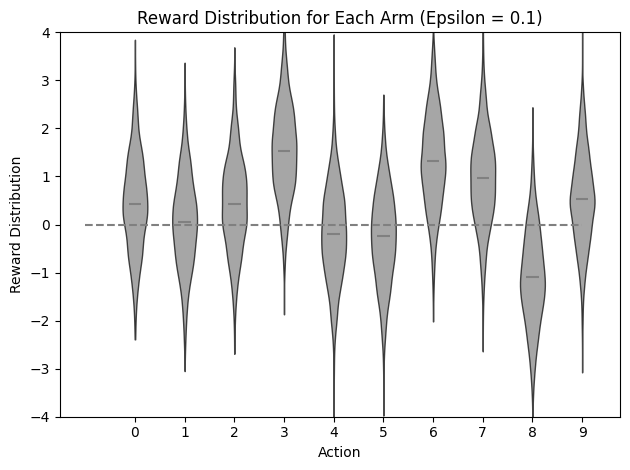

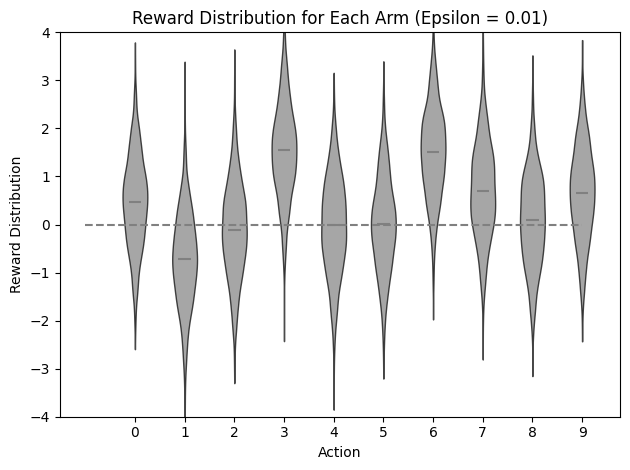

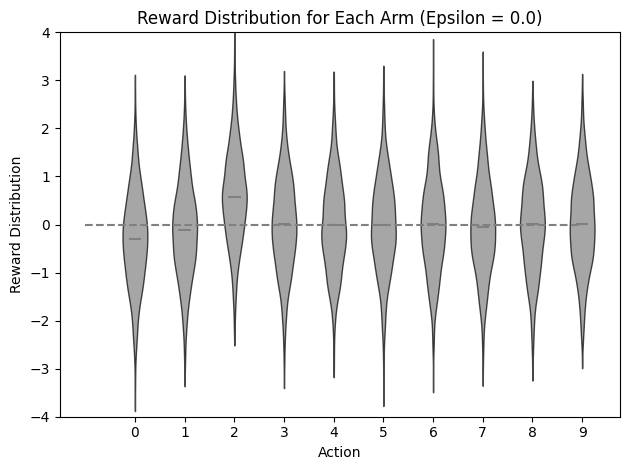

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
epsilons = [0.1, 0.01, 0.0]  # list of epsilon values to compare

# Step 1: Generate true action values for each arm (q*(a)) from a normal distribution
true_action_values = np.random.normal(0, 1, n_arms)  # Mean = 0, Variance = 1
# Print the true probabilities for each arm
print("True Action Values for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_action_values[arm]:.4f}")

# Simulation for each epsilon value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(epsilons)))
reward_distribution = np.zeros((n_arms, len(epsilons)))

for idx, epsilon in enumerate(epsilons):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(n_trials):
        # Exploration with epsilon probability
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(0, n_arms)
        else:
            # Exploitation - pick the arm with the highest average reward
            average_reward = wins / (trials + 1e-10)  # Avoid division by zero
            chosen_arm = np.argmax(average_reward)

        # Step 2: Calculate the reward for the chosen arm
        reward = np.random.normal(true_action_values[chosen_arm], 1)  # Normal distribution with mean q*(a) and variance 1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t] = total_reward
        if chosen_arm == np.argmax(true_action_values):  # Optimal action is the one with the highest q*(a)
            optimal_action_counts[t] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for each epsilon
    results[epsilon] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm and epsilon
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for epsilon in epsilons:
    plt.plot(results[epsilon][0], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Epsilons")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for epsilon in epsilons:
    plt.plot(results[epsilon][1], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Epsilons")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm
for idx, epsilon in enumerate(epsilons):
    print(f"Average reward distribution for epsilon = {epsilon}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm separately for each epsilon
for idx, epsilon in enumerate(epsilons):
    # Generate the violin plot using actual rewards from the simulation
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Use rewards from the simulation for the violin plot
    reward_samples = np.array([np.random.normal(average_reward_distribution[arm, idx], 1, n_trials) for arm in range(n_arms)]).T

    # Create the violin plot
    parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

    # Set color for each violin body
    for pc in parts['bodies']:
        pc.set_facecolor('gray')  # Gray color for violins
        pc.set_edgecolor('black')  # Optional: adds border to violins
        pc.set_alpha(0.7)  # Optional: adjust transparency

    # Set color for the mean marker
    parts['cmeans'].set_color('gray')

    # Add a horizontal dashed line at y=0
    ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

    # Set y-axis limits
    ax.set_ylim([-4, 4])

    # Set x-axis ticks and labels explicitly to start from 0
    ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
    ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)


    # Add axis labels
    ax.set_xlabel("Action")
    ax.set_ylabel("Reward Distribution")
    # Add a title for the plot (including epsilon value)
    ax.set_title(f"Reward Distribution for Each Arm (Epsilon = {epsilon})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


# Upper Confidence Bound (UCB)

$$UCB(a) = \hat{Q}(a) + c \cdot \sqrt{\frac{\ln(t)}{N(a)}}$$

True Action Values for Each Arm:
Arm 0: 0.4967
Arm 1: -0.1383
Arm 2: 0.6477
Arm 3: 1.5230
Arm 4: -0.2342
Arm 5: -0.2341
Arm 6: 1.5792
Arm 7: 0.7674
Arm 8: -0.4695
Arm 9: 0.5426


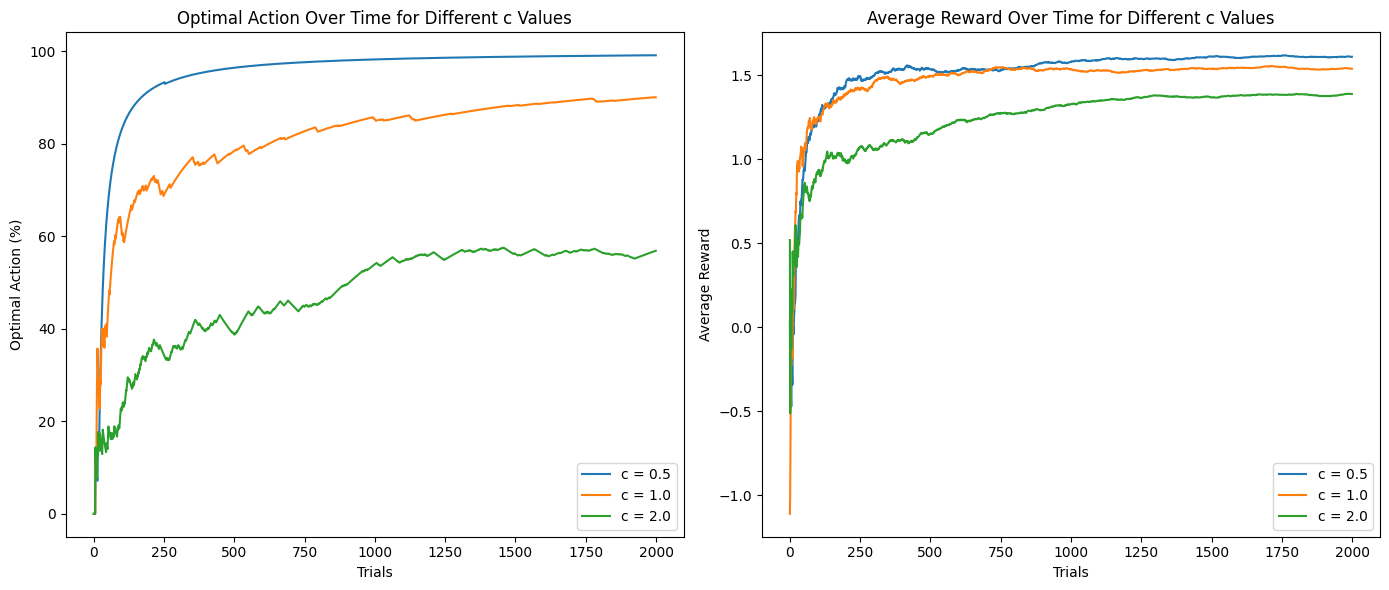

Average reward distribution for c = 0.5:
Arm 0: -0.2472 average reward
Arm 1: -0.6040 average reward
Arm 2: 0.6868 average reward
Arm 3: -0.3903 average reward
Arm 4: -1.9591 average reward
Arm 5: -0.7964 average reward
Arm 6: 1.6253 average reward
Arm 7: 0.7350 average reward
Arm 8: -1.3775 average reward
Arm 9: -0.8697 average reward


Average reward distribution for c = 1.0:
Arm 0: 0.2712 average reward
Arm 1: -0.7176 average reward
Arm 2: 0.4602 average reward
Arm 3: 1.3667 average reward
Arm 4: -1.3292 average reward
Arm 5: -0.4082 average reward
Arm 6: 1.5934 average reward
Arm 7: 0.4376 average reward
Arm 8: -0.3871 average reward
Arm 9: -1.2252 average reward


Average reward distribution for c = 2.0:
Arm 0: 0.3723 average reward
Arm 1: -0.4759 average reward
Arm 2: 0.6066 average reward
Arm 3: 1.4679 average reward
Arm 4: -0.3557 average reward
Arm 5: -0.3111 average reward
Arm 6: 1.5494 average reward
Arm 7: 0.6191 average reward
Arm 8: -0.6937 average reward
Arm 9: 0.4311 av

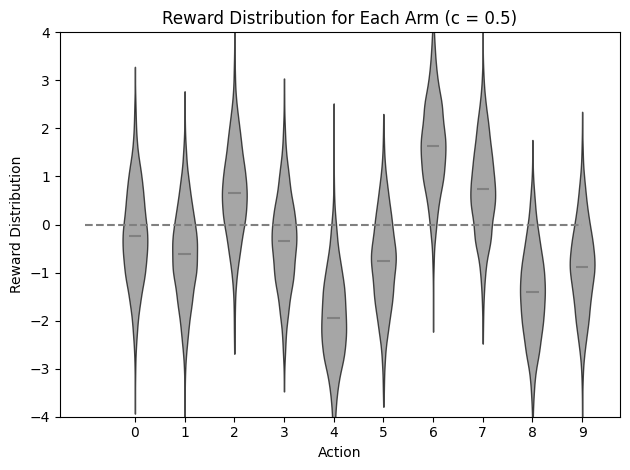

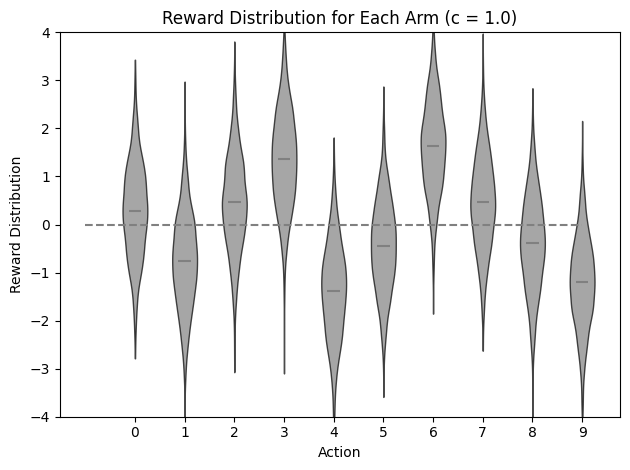

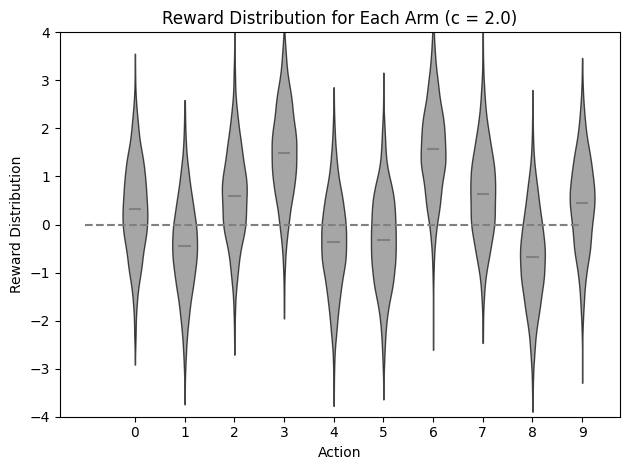

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
c_values = [0.5, 1.0, 2.0]  # List of different c values to compare

# Step 1: Generate true action values for each arm (q*(a)) from a normal distribution
true_action_values = np.random.normal(0, 1, n_arms)  # Mean = 0, Variance = 1
# Print the true probabilities for each arm
print("True Action Values for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_action_values[arm]:.4f}")

# Initialize a dictionary to store results for each c value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(c_values)))

for idx, c_value in enumerate(c_values):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # Calculate UCB for each arm with the current c_value
        ucb_values = (wins / (trials + 1e-10)) + c_value * np.sqrt(2 * np.log(t) / (trials + 1e-10))

        # Choose the arm with the highest UCB
        chosen_arm = np.argmax(ucb_values)

        # Step 2: Calculate the reward for the chosen arm
        reward = np.random.normal(true_action_values[chosen_arm], 1)  # Normal distribution with mean q*(a) and variance 1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == np.argmax(true_action_values):  # Optimal action is the one with the highest q*(a)
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for the current c_value
    results[c_value] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions for each c value
plt.subplot(1, 2, 1)
for c_value in c_values:
    plt.plot(results[c_value][0], label=f"c = {c_value}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different c Values")
plt.legend()

# Plot average reward for each c value
plt.subplot(1, 2, 2)
for c_value in c_values:
    plt.plot(results[c_value][1], label=f"c = {c_value}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different c Values")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm and c value
for idx, c_value in enumerate(c_values):
    print(f"Average reward distribution for c = {c_value}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm using violin plot for each c value
for idx, c_value in enumerate(c_values):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Generate reward samples using the average reward distribution
    reward_samples = np.array([np.random.normal(average_reward_distribution[arm, idx], 1, n_trials) for arm in range(n_arms)]).T

    # Create the violin plot
    parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

    # Set color for each violin body
    for pc in parts['bodies']:
        pc.set_facecolor('gray')  # Gray color for violins
        pc.set_edgecolor('black')  # Optional: adds border to violins
        pc.set_alpha(0.7)  # Optional: adjust transparency

    # Set color for the mean marker
    parts['cmeans'].set_color('gray')

    # Add a horizontal dashed line at y=0
    ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

    # Set y-axis limits
    ax.set_ylim([-4, 4])

    # Set x-axis ticks and labels explicitly to start from 0
    ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
    ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)

    # Add axis labels
    ax.set_xlabel("Action")
    ax.set_ylabel("Reward Distribution")
    # Add a title for the plot (including c value)
    ax.set_title(f"Reward Distribution for Each Arm (c = {c_value})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


# Softmax

$$P(a) = \frac{e^{\hat{Q}(a)/\tau}}{\sum_{b=1}^{N}e^{\hat{Q}(b)/\tau}}$$

True Action Values for Each Arm:
Arm 0: 0.4967
Arm 1: -0.1383
Arm 2: 0.6477
Arm 3: 1.5230
Arm 4: -0.2342
Arm 5: -0.2341
Arm 6: 1.5792
Arm 7: 0.7674
Arm 8: -0.4695
Arm 9: 0.5426


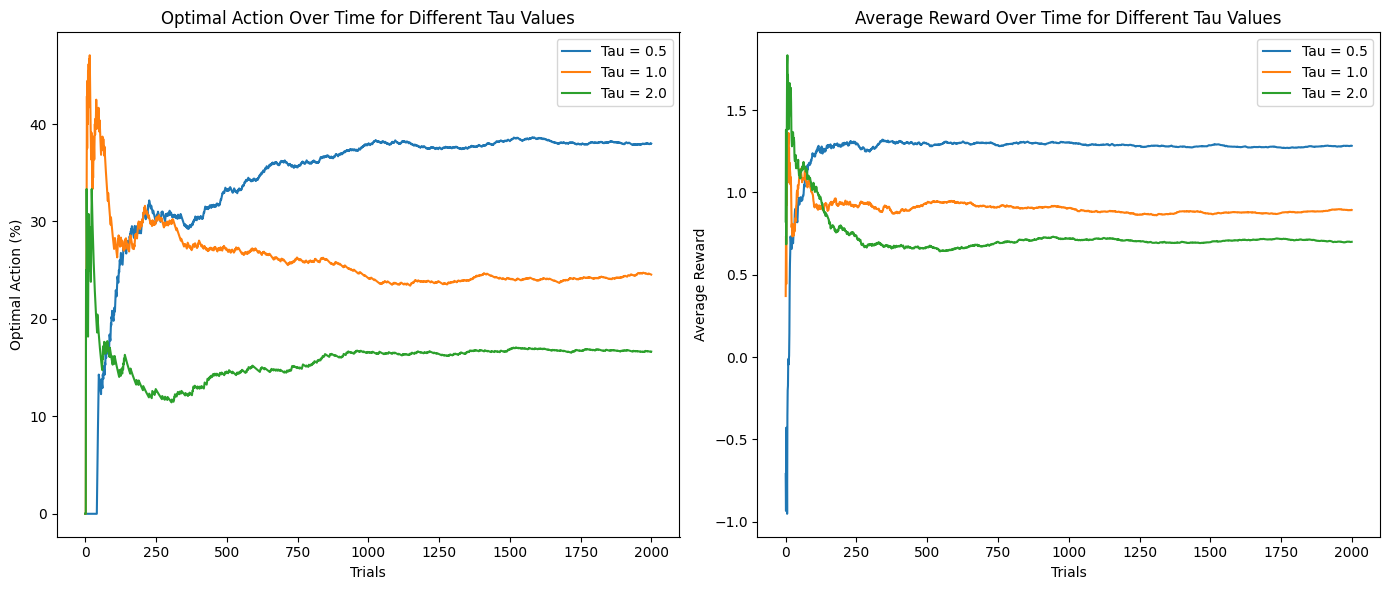

Average reward distribution for tau = 0.5:
Arm 0: 0.5852 average reward
Arm 1: -0.2849 average reward
Arm 2: 0.7613 average reward
Arm 3: 1.5009 average reward
Arm 4: -0.2277 average reward
Arm 5: -1.1582 average reward
Arm 6: 1.5737 average reward
Arm 7: 0.7426 average reward
Arm 8: -1.8813 average reward
Arm 9: 0.6075 average reward


Average reward distribution for tau = 1.0:
Arm 0: 0.3717 average reward
Arm 1: -0.0645 average reward
Arm 2: 0.5300 average reward
Arm 3: 1.4984 average reward
Arm 4: -0.3581 average reward
Arm 5: -0.2318 average reward
Arm 6: 1.5715 average reward
Arm 7: 0.7043 average reward
Arm 8: -0.5757 average reward
Arm 9: 0.4658 average reward


Average reward distribution for tau = 2.0:
Arm 0: 0.4382 average reward
Arm 1: -0.1520 average reward
Arm 2: 0.6934 average reward
Arm 3: 1.4952 average reward
Arm 4: -0.2069 average reward
Arm 5: -0.3277 average reward
Arm 6: 1.6095 average reward
Arm 7: 0.7091 average reward
Arm 8: -0.4425 average reward
Arm 9: 0.6802 

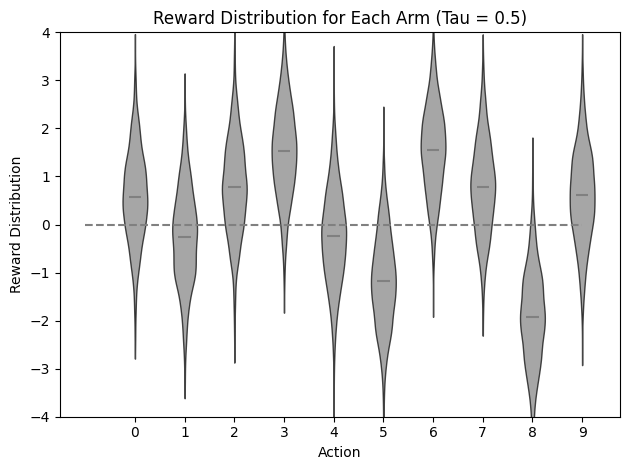

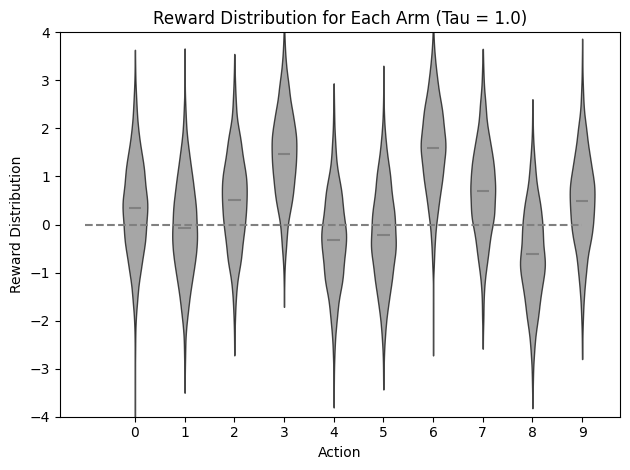

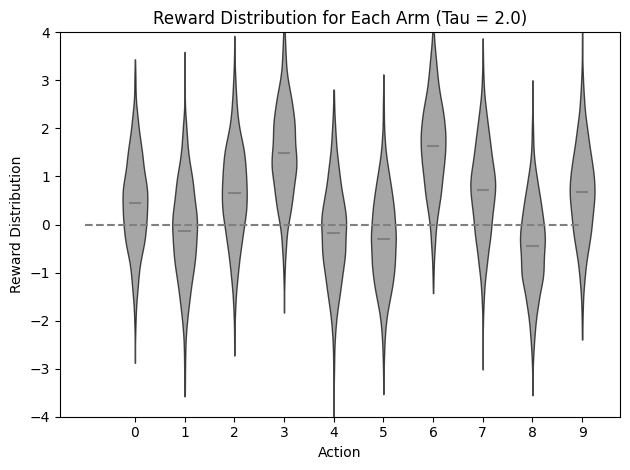

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
tau_values = [0.5, 1.0, 2.0]  # List of different tau values to compare

# Step 1: Generate true action values for each arm (q*(a)) from a normal distribution
true_action_values = np.random.normal(0, 1, n_arms)  # Mean = 0, Variance = 1
# Print the true probabilities for each arm
print("True Action Values for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_action_values[arm]:.4f}")

# Initialize a dictionary to store results for each tau value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(tau_values)))

for idx, tau_value in enumerate(tau_values):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # Calculate the Softmax probabilities for each arm
        q_values = wins / (trials + 1e-10)  # Estimated values for each arm
        exp_values = np.exp(q_values / tau_value)  # Apply Softmax formula
        probabilities = exp_values / np.sum(exp_values)  # Normalize probabilities

        # Choose the arm based on Softmax probabilities
        chosen_arm = np.random.choice(n_arms, p=probabilities)

        # Step 2: Calculate the reward for the chosen arm
        reward = np.random.normal(true_action_values[chosen_arm], 1)  # Normal distribution with mean q*(a) and variance 1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == np.argmax(true_action_values):  # Optimal action is the one with the highest q*(a)
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for the current tau_value
    results[tau_value] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions for each tau value
plt.subplot(1, 2, 1)
for tau_value in tau_values:
    plt.plot(results[tau_value][0], label=f"Tau = {tau_value}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Tau Values")
plt.legend()

# Plot average reward for each tau value
plt.subplot(1, 2, 2)
for tau_value in tau_values:
    plt.plot(results[tau_value][1], label=f"Tau = {tau_value}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Tau Values")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm and tau value
for idx, tau_value in enumerate(tau_values):
    print(f"Average reward distribution for tau = {tau_value}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm using violin plot for each tau value
for idx, tau_value in enumerate(tau_values):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Generate reward samples using the average reward distribution
    reward_samples = np.array([np.random.normal(average_reward_distribution[arm, idx], 1, n_trials) for arm in range(n_arms)]).T

    # Create the violin plot
    parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

    # Set color for each violin body
    for pc in parts['bodies']:
        pc.set_facecolor('gray')  # Gray color for violins
        pc.set_edgecolor('black')  # Optional: adds border to violins
        pc.set_alpha(0.7)  # Optional: adjust transparency

    # Set color for the mean marker
    parts['cmeans'].set_color('gray')

    # Add a horizontal dashed line at y=0
    ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

    # Set y-axis limits
    ax.set_ylim([-4, 4])

    # Set x-axis ticks and labels explicitly to start from 0
    ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
    ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)

    # Add axis labels
    ax.set_xlabel("Action")
    ax.set_ylabel("Reward Distribution")
    # Add a title for the plot (including tau value)
    ax.set_title(f"Reward Distribution for Each Arm (Tau = {tau_value})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
